##Exploratory Data Analysis

Importing necessary Libraries

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn import svm
import seaborn as sns
%matplotlib inline

Reading the file

In [64]:
df=pd.read_csv('/content/digit_svm.csv')

In [65]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df.shape

(42000, 785)

Checking for null values using isnull().sum()

In [67]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


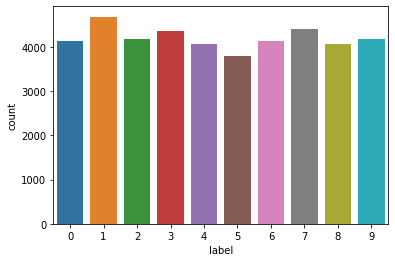

In [68]:
sns.countplot(df["label"])

Showing a graph and counting the number of times each digit appears

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

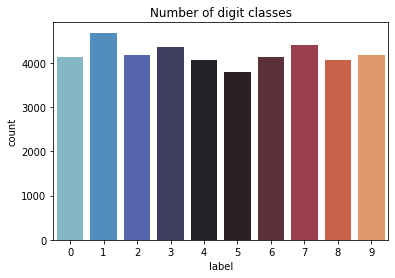

In [69]:
plt.plot(figure = (16,10))
g = sns.countplot( df["label"], palette = 'icefire')
plt.title('Number of digit classes')
df.label.astype('category').value_counts()

Showing the digit '4'

Text(0.5, 1.0, 'Digit 4')

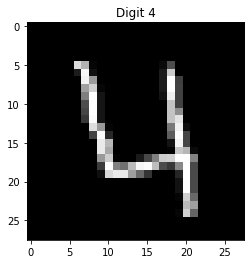

In [70]:
four = df.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Showing the digit '7'

Text(0.5, 1.0, 'Digit 7')

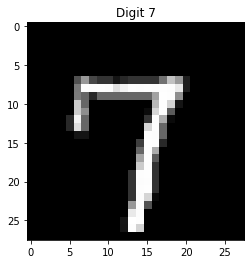

In [71]:
seven = df.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

#Preparing Data for Models

In [72]:
df = pd.get_dummies(df)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
x = df.iloc[0:5000,1:].values
y = df.iloc[0:5000,:1].values

In [74]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
y

array([[1],
       [0],
       [1],
       ...,
       [8],
       [7],
       [9]])

Dividing the data for training and testing 

In [76]:
x_train, x_test,y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

Using StandardScaler() to scale x_train and x_test

In [79]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [80]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Classification Models

In [81]:
from sklearn.svm import SVC

SVC Linear Kernel

Importing SVC and using linear kernel to build the model

In [82]:
clf = SVC(kernel="linear", random_state=0)

In [83]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [84]:
pred_y = clf.predict(x_test)

In [85]:
pred_y

array([7, 7, 6, 9, 2, 7, 8, 1, 4, 2, 8, 2, 8, 3, 2, 5, 9, 0, 3, 5, 6, 0,
       4, 6, 5, 8, 3, 8, 2, 3, 2, 5, 0, 0, 5, 4, 0, 7, 1, 2, 9, 9, 3, 2,
       1, 4, 0, 0, 4, 8, 5, 0, 1, 6, 5, 8, 5, 9, 4, 3, 9, 0, 4, 0, 1, 7,
       5, 0, 1, 3, 5, 2, 8, 1, 2, 0, 1, 7, 9, 9, 8, 7, 7, 7, 5, 0, 7, 9,
       1, 5, 4, 1, 9, 0, 4, 7, 2, 2, 9, 9, 5, 2, 2, 6, 0, 4, 8, 9, 3, 1,
       9, 4, 0, 6, 8, 4, 6, 4, 0, 2, 9, 9, 2, 6, 7, 7, 8, 5, 5, 8, 7, 8,
       2, 7, 4, 1, 6, 4, 2, 7, 9, 3, 1, 4, 9, 5, 8, 4, 3, 7, 5, 1, 0, 3,
       0, 1, 9, 6, 4, 2, 3, 5, 4, 7, 7, 4, 2, 8, 9, 9, 1, 8, 4, 9, 4, 0,
       5, 6, 8, 4, 3, 4, 0, 3, 6, 2, 4, 1, 5, 0, 6, 6, 4, 0, 1, 4, 5, 4,
       7, 2, 7, 2, 3, 6, 0, 4, 2, 3, 0, 9, 9, 1, 9, 2, 1, 4, 6, 1, 9, 8,
       2, 6, 9, 2, 0, 7, 0, 0, 6, 0, 1, 4, 5, 1, 9, 2, 1, 6, 3, 2, 1, 8,
       1, 1, 2, 5, 5, 0, 4, 9, 1, 1, 2, 7, 7, 3, 1, 4, 6, 2, 8, 6, 7, 2,
       5, 6, 8, 0, 1, 3, 4, 7, 1, 7, 2, 6, 8, 9, 7, 8, 1, 1, 4, 9, 5, 6,
       4, 4, 2, 8, 7, 7, 4, 2, 3, 4, 1, 3, 6, 0, 3,

In [86]:
y_test

array([[4],
       [7],
       [6],
       [9],
       [2],
       [7],
       [8],
       [1],
       [4],
       [2],
       [8],
       [2],
       [5],
       [3],
       [2],
       [5],
       [9],
       [0],
       [3],
       [5],
       [6],
       [0],
       [4],
       [6],
       [5],
       [8],
       [3],
       [5],
       [2],
       [5],
       [2],
       [5],
       [0],
       [0],
       [5],
       [4],
       [0],
       [7],
       [1],
       [2],
       [9],
       [9],
       [3],
       [2],
       [7],
       [4],
       [0],
       [0],
       [4],
       [8],
       [5],
       [0],
       [1],
       [6],
       [5],
       [8],
       [5],
       [9],
       [4],
       [3],
       [9],
       [0],
       [4],
       [0],
       [1],
       [7],
       [5],
       [0],
       [1],
       [3],
       [5],
       [2],
       [8],
       [1],
       [2],
       [0],
       [1],
       [7],
       [9],
       [9],
       [8],
       [7],
       [7],
    

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
confusion_matrix(y_test, pred_y)

array([[103,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  96,   1,   1,   0,   0,   1,   1,   0,   0],
       [  1,   1,  92,   2,   3,   0,   3,   1,   1,   0],
       [  0,   1,   1,  90,   0,   1,   1,   1,   4,   1],
       [  0,   0,   1,   0, 100,   0,   1,   1,   0,   4],
       [  1,   2,   0,   3,   0,  80,   4,   0,   4,   0],
       [  2,   1,   1,   0,   0,   1,  88,   0,   0,   0],
       [  0,   5,   3,   0,   1,   1,   0, 100,   2,   4],
       [  1,   7,   2,   2,   0,   3,   1,   0,  69,   0],
       [  1,   0,   2,   2,   4,   1,   0,   2,   1,  85]])

In [89]:
accuracy_score(y_test, pred_y)

0.903

We got an accuracy of 90.3% by using Linear Kernel in the SVC model

SVC rbf Kernel

We will now build another SVC model using rbf as kernel

In [92]:
clf_rbf = SVC(kernel="rbf", random_state=0)

In [93]:
clf_rbf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
pred_y1= clf_rbf.predict(x_test)

In [95]:
pred_y1

array([4, 7, 6, 9, 2, 7, 8, 1, 4, 2, 8, 2, 5, 3, 2, 5, 9, 0, 3, 5, 6, 0,
       4, 6, 5, 8, 3, 5, 2, 3, 2, 5, 0, 0, 5, 4, 0, 7, 1, 2, 9, 9, 3, 2,
       1, 4, 0, 0, 4, 8, 5, 0, 1, 6, 5, 8, 5, 9, 4, 3, 9, 0, 4, 0, 1, 7,
       5, 0, 1, 3, 5, 2, 8, 1, 2, 0, 1, 7, 9, 9, 8, 7, 7, 7, 5, 0, 7, 9,
       1, 5, 4, 4, 9, 0, 4, 7, 2, 2, 9, 7, 5, 2, 2, 6, 0, 4, 8, 9, 3, 1,
       9, 4, 0, 6, 8, 4, 6, 4, 0, 2, 9, 9, 2, 6, 7, 7, 8, 5, 5, 2, 7, 8,
       2, 7, 4, 8, 2, 4, 2, 9, 4, 3, 1, 4, 9, 5, 8, 4, 2, 2, 5, 1, 6, 3,
       2, 8, 9, 6, 4, 2, 3, 5, 4, 7, 7, 4, 2, 8, 9, 9, 1, 8, 4, 9, 4, 0,
       5, 6, 8, 4, 3, 4, 0, 3, 6, 2, 4, 1, 5, 0, 6, 6, 4, 0, 8, 4, 5, 2,
       7, 2, 7, 2, 3, 6, 0, 4, 2, 3, 0, 7, 9, 1, 9, 2, 1, 4, 2, 1, 9, 8,
       2, 6, 5, 2, 0, 7, 0, 0, 2, 0, 1, 4, 5, 8, 4, 2, 1, 6, 3, 2, 1, 8,
       1, 1, 7, 5, 3, 0, 4, 9, 1, 1, 2, 7, 7, 3, 1, 4, 6, 2, 8, 6, 7, 6,
       5, 6, 0, 0, 1, 3, 4, 7, 1, 7, 2, 6, 8, 9, 7, 8, 1, 1, 4, 9, 5, 6,
       9, 2, 2, 8, 7, 7, 4, 2, 3, 4, 1, 3, 6, 0, 3,

In [96]:
y_test

array([[4],
       [7],
       [6],
       [9],
       [2],
       [7],
       [8],
       [1],
       [4],
       [2],
       [8],
       [2],
       [5],
       [3],
       [2],
       [5],
       [9],
       [0],
       [3],
       [5],
       [6],
       [0],
       [4],
       [6],
       [5],
       [8],
       [3],
       [5],
       [2],
       [5],
       [2],
       [5],
       [0],
       [0],
       [5],
       [4],
       [0],
       [7],
       [1],
       [2],
       [9],
       [9],
       [3],
       [2],
       [7],
       [4],
       [0],
       [0],
       [4],
       [8],
       [5],
       [0],
       [1],
       [6],
       [5],
       [8],
       [5],
       [9],
       [4],
       [3],
       [9],
       [0],
       [4],
       [0],
       [1],
       [7],
       [5],
       [0],
       [1],
       [3],
       [5],
       [2],
       [8],
       [1],
       [2],
       [0],
       [1],
       [7],
       [9],
       [9],
       [8],
       [7],
       [7],
    

In [97]:
confusion_matrix(y_test, pred_y1)

array([[100,   0,   1,   0,   0,   0,   1,   0,   1,   0],
       [  0,  96,   0,   1,   0,   0,   2,   1,   0,   0],
       [  0,   0,  95,   0,   3,   0,   0,   1,   4,   1],
       [  0,   0,   5,  89,   0,   0,   0,   1,   4,   1],
       [  0,   0,   6,   0,  99,   0,   0,   0,   0,   2],
       [  0,   2,   2,   2,   0,  83,   5,   0,   0,   0],
       [  1,   0,   1,   0,   0,   0,  90,   0,   1,   0],
       [  0,   6,   3,   0,   2,   0,   0, 101,   0,   4],
       [  0,   1,   3,   1,   0,   4,   0,   0,  76,   0],
       [  3,   0,   2,   1,   4,   1,   0,   4,   1,  82]])

In [98]:
accuracy_score(y_test, pred_y1)

0.911

We got an accuracy of 91.1% when we used rbf kernel in the SVC model

In [99]:
print('The accuracy score of SVC Linear Kernel is: ', accuracy_score(y_test, pred_y)*100,'%')
print('The accuracy score of SVC rbf Kernel is: ', accuracy_score(y_test, pred_y1)*100,'%')

The accuracy score of SVC Linear Kernel is:  90.3 %
The accuracy score of SVC rbf Kernel is:  91.10000000000001 %


#Results

In [100]:
l_acc = accuracy_score(y_test, pred_y)
rbf_acc = accuracy_score(y_test, pred_y1)

In [101]:
model = ['Linear Kernel SVC', 'rbf Kernel SVC']
score = [l_acc, rbf_acc]

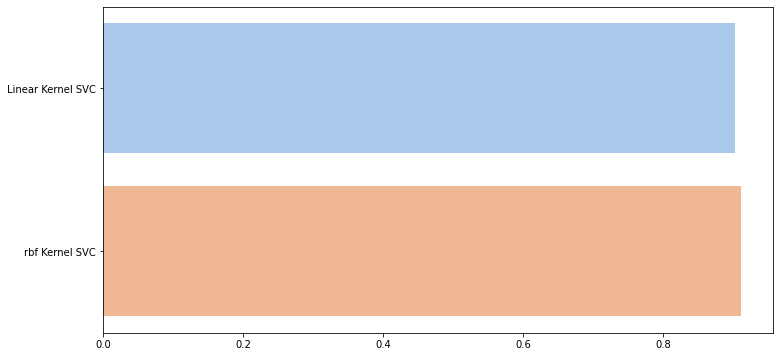

In [109]:
plt.figure(figsize = (12, 6))
sns.barplot(x = score, y = model, palette = 'pastel')
plt.show()

rbf Kernel SVC gives us higher accuracy of 91.1% than linear kernel SVC which had an accuracy of 90.3%